In [1]:
# spectral tensor train decomposition page 20
import numpy as np 
%matplotlib inline
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np


params = {
   'axes.labelsize': 20,
   'font.size': 20,
   'legend.fontsize': 12,
   'xtick.labelsize': 15,
   'ytick.labelsize': 15,
   'text.usetex': False,
   }
mpl.rcParams.update(params)

sns.set_style("whitegrid")
sns.despine()

def f1(x, w, c):
    y=np.cos(2*np.pi*w +  c*x)
    return y

def f2(x, w, c):
    y=(c**(-2) + (x+w)**2)**(-1)
    return y

def f3(x, w, c):
    y = (1 + c*x)**(-2)
    return y

def f4(x, w, c):
    y = np.exp(- c**2 *(x-w)**2)
    return y

def f5(x, w, c):
    y = np.exp(- c**2 *np.abs(x-w) )
    return y

def f6(x, w, c):
    if x > w:
        y = 0
    else:
        y = np.exp(c * x)
    return y

<Figure size 432x288 with 0 Axes>

In [2]:
# YS Parameters
# w = 0.5
# c = 10
def gen_xs(Genz, T):
    # Generate the function
    ys = []
    xs = np.linspace(0,1.0,T)
    for x_i in xs:
        ys.append(Genz(x_i, w, c))
    print('ys generated')
    return ys


def gen_ts(Genz, h0, T):
    # Generate the dynamics
    ts = []
    h1 = h0
    for i in range(T):
        h2 = Genz(h1, w, c)
        h1 = np.copy(h2)
        ts.append(h1)
#     print('ts generated')
    return ts

def gen_dat(Genz, N, T):
    # generate n x t x 1 
    dat = np.empty((N,T,1))
    #random initial 
    init_range = np.random.uniform(-0.1,1.0,(N,))

    for i in range(N):
        h0 = init_range[i]
        dat[i,:,0] = np.asarray(gen_ts(Genz, h0, T))
    return dat

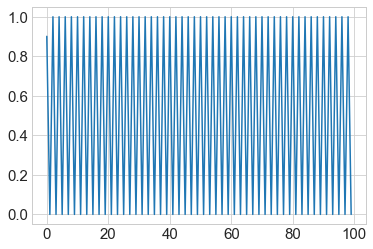

In [3]:
# generate one 
%matplotlib inline
w = 0.5
c = 3
Genz = f6
dat = gen_dat(Genz, 1, 100)
plt.plot(np.squeeze(dat))

## N = 1000
T = 100
n = 4
print('f'+str(n))
Genz = globals()["f"+str(n)]
dat = gen_dat(Genz, N, T)
np.save('data_genz'+str(n)+'.npy', dat)

data = np.load('data_genz'+str(n)+'.npy')
data.shape

In [7]:
# fig = plt.plot(data[0:2,:,0].T)

In [6]:
# data_pred = np.load('predict_TCNLSTM_logistic.npy')
# data_pred.shape

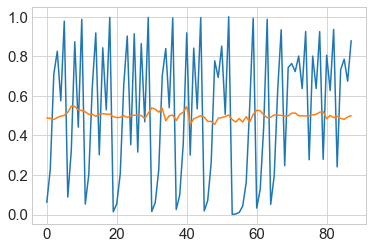

In [5]:
# fig = plt.plot(data_pred[:,10,:,0].T)

In [50]:
from reader import read_data_sets
dataset, stats = read_data_sets('data.npy', True, 12, 88)
batch_x, batch_y, batch_z = dataset.train.next_batch(50)

loading time series ...
input type  <class 'numpy.ndarray'> (1000, 100, 1)
normalize to (0-1)


In [51]:
batch_x.shape

(50, 12, 1)

In [59]:
dataset.train.enc_inps.shape, dataset.validation.enc_inps.shape, dataset.test.enc_inps.shape

((810, 12, 1), (90, 12, 1), (100, 12, 1))

In [97]:
def gen_ts(h0, T):
    # Generate the dynamics
    ts = []
    h1 = h0
    for i in range(T):
        h2 = 3. * h1 * (1-h1) 
        h1 = np.copy(h2)
        ts.append(h1)
    return ts

def gen_dat(N, T):
    # generate n x t x 1 
    dat = np.empty((N,T,1))
    #random initial 
    init_range = np.random.uniform(0.0,1.0,(N,))

    for i in range(N):
        h0 = init_range[i]
        dat[i,:,0] = np.asarray(gen_ts(h0, T))
    return dat

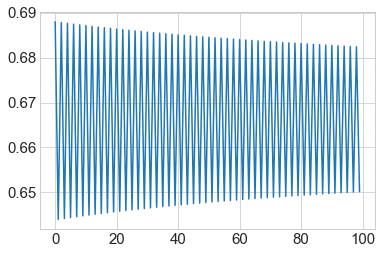

In [98]:
# N = int(1e3)
N = 1
T = 100

dat = gen_dat(N, T)
# np.save('data_logistic.npy', dat)

# dat = np.load('data_logistic.npy')
dat.shape
fig = plt.plot(dat[0,:,0].T)

In [8]:
def fp1(x, w, c):
    y= -c * np.sin(2*np.pi*w +  c*x)
    return y

def fp2(x, w, c):
    y= -2 * (x+w) * (c**(-2) + (x+w)**2)**(-2)
    return y

def fp3(x, w, c):
    y = -2*c * (1 + c*x)**(-3)
    return y

def fp4(x, w, c):
    y = -c**2*2*(x-w) * np.exp(- c**2 *(x-w)**2)
    return y

def fp5(x, w, c):
    if x >w:
        y = - c**2 * np.exp(- c**2*np.abs(x-w) )
    else:
        y = c**2 * np.exp(- c**2*np.abs(x-w) )
    return y

def fp6(x, w, c):
    if x > w:
        y = 0
    else:
        y = c * np.exp(c * x)
    return y

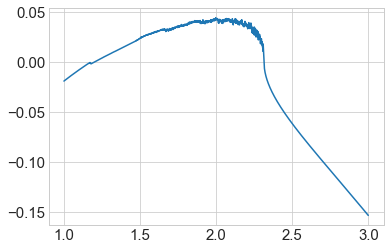

In [26]:
# c = 3
w = 0.5

lyap=np.zeros(2000)
j=0
for j in range(2000):
    xn1 = np.random.uniform(0.0,1.0)
    lyp = 0
    c = 1.0 + j*0.001
    for i in range(1000):
        xn = xn1
#         xn1 = np.exp(- c**2 *(xn-w)**2)
        xn1 = f5(xn, w, c)
        if i>300:
            lyp += np.log(abs(fp5(xn1, w, c)))
    lyp /= 10000
    lyap[j] = lyp
    
c = [1.0+j*0.001  for j in range(2000)]
plt.plot(c, lyap)

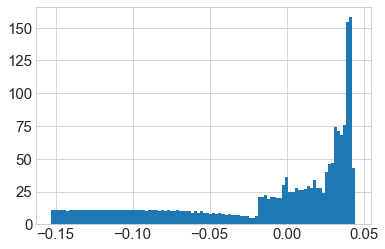

In [27]:
plt.hist(lyap, bins=100)
plt.show()